<a href="https://colab.research.google.com/github/acafiero/sports-project2/blob/main/Cafiero_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix

 ## *Dataset 1*
 1) github / Five Thirty Eight

 2) statistical data for modern NBA players

 3) Who has generated the highest Wins Above Replacement since 2014 when factoring RAPTOR

 4) Regression

 5) 21 features

 6) 4078 rows

 7) There are multiple entries for the same player but from differing years, I would imagine I might need to either do averages for all the years these players played or pick a specific year to focus on

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/modern_RAPTOR_by_player.csv')

In [4]:
df.head()

,player_name,player_id,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,...,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Alex Abrines,abrinal01,2017,2387,1135,0.745505,-0.372938,0.372567,-0.418553,-3.857011,...,0.543421,-1.144832,-0.601411,1.249008,1.447708,-0.198700,0.077102,-1.038677,-0.961575,0.326413
1,Alex Abrines,abrinal01,2018,2546,1244,0.317549,-1.725325,-1.407776,-1.291727,-0.049694,...,-0.020826,-1.502642,-1.523468,0.777304,0.465912,0.311392,-0.174621,-1.112625,-1.287247,-0.456141
2,Alex Abrines,abrinal01,2019,1279,588,-3.215683,1.078399,-2.137285,-6.158856,4.901168,...,-4.040157,1.885618,-2.154538,0.178167,0.178167,0.000000,-4.577678,1.543282,-3.034396,-0.268013
3,Precious Achiuwa,achiupr01,2021,1581,749,-4.122966,1.359278,-2.763688,-4.050779,-0.919712,...,-4.347596,0.954821,-3.392775,-0.246055,-0.246776,0.000721,-3.817713,0.474828,-3.342885,0.329157
4,Quincy Acy,acyqu01,2014,1716,847,-1.716079,0.133115,-1.582964,-0.324811,-1.661495,...,-1.565257,-0.216477,-1.781734,0.415918,0.415918,0.000000,-1.464417,-0.223754,-1.688171,-0.554898


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4079 entries, 0 to 4078
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   player_name           4079 non-null   object 
 1   player_id             4079 non-null   object 
 2   season                4079 non-null   int64  
 3   poss                  4079 non-null   int64  
 4   mp                    4079 non-null   int64  
 5   raptor_box_offense    4078 non-null   float64
 6   raptor_box_defense    4078 non-null   float64
 7   raptor_box_total      4078 non-null   float64
 8   raptor_onoff_offense  4078 non-null   float64
 9   raptor_onoff_defense  4078 non-null   float64
 10  raptor_onoff_total    4078 non-null   float64
 11  raptor_offense        4079 non-null   float64
 12  raptor_defense        4079 non-null   float64
 13  raptor_total          4079 non-null   float64
 14  war_total             4079 non-null   float64
 15  war_reg_season       

In [6]:
df.duplicated().sum()

## no duplicated values

0

In [7]:
df.nunique()

## checking all the various features

player_name             1192
player_id               1187
season                     8
poss                    2867
mp                      2130
raptor_box_offense      4078
raptor_box_defense      4078
raptor_box_total        4078
raptor_onoff_offense    4077
raptor_onoff_defense    4077
raptor_onoff_total      4077
raptor_offense          4079
raptor_defense          4079
raptor_total            4079
war_total               4079
war_reg_season          4075
war_playoffs            1717
predator_offense        4079
predator_defense        4079
predator_total          4079
pace_impact             4078
dtype: int64

In [8]:
df.isna().sum()

## checking for rows missing data

player_name             0
player_id               0
season                  0
poss                    0
mp                      0
raptor_box_offense      1
raptor_box_defense      1
raptor_box_total        1
raptor_onoff_offense    1
raptor_onoff_defense    1
raptor_onoff_total      1
raptor_offense          0
raptor_defense          0
raptor_total            0
war_total               0
war_reg_season          0
war_playoffs            0
predator_offense        0
predator_defense        0
predator_total          0
pace_impact             1
dtype: int64

In [9]:
df.dropna()
df.isna().sum()

## dropped all rows missing values from the dataframe

player_name             0
player_id               0
season                  0
poss                    0
mp                      0
raptor_box_offense      1
raptor_box_defense      1
raptor_box_total        1
raptor_onoff_offense    1
raptor_onoff_defense    1
raptor_onoff_total      1
raptor_offense          0
raptor_defense          0
raptor_total            0
war_total               0
war_reg_season          0
war_playoffs            0
predator_offense        0
predator_defense        0
predator_total          0
pace_impact             1
dtype: int64

In [10]:
df.drop(['player_id', 'season', 'raptor_box_offense', 'raptor_box_defense', 'raptor_onoff_offense', 'raptor_onoff_defense', 'raptor_offense', 'raptor_defense',  'war_reg_season', 'war_playoffs', 'predator_offense', 'predator_defense'], axis=1, inplace=True)
df.head()

,player_name,poss,mp,raptor_box_total,raptor_onoff_total,raptor_total,war_total,predator_total,pace_impact
0,Alex Abrines,2387,1135,0.372567,-4.275564,-0.601411,1.249008,-0.961575,0.326413
1,Alex Abrines,2546,1244,-1.407776,-1.341421,-1.523468,0.777304,-1.287247,-0.456141
2,Alex Abrines,1279,588,-2.137285,-1.257688,-2.154538,0.178167,-3.034396,-0.268013
3,Precious Achiuwa,1581,749,-2.763688,-4.970491,-3.392775,-0.246055,-3.342885,0.329157
4,Quincy Acy,1716,847,-1.582964,-1.986306,-1.781734,0.415918,-1.688171,-0.554898


In [11]:
df = df.loc[df['war_total'] >= 1]
df

,player_name,poss,mp,raptor_box_total,raptor_onoff_total,raptor_total,war_total,predator_total,pace_impact
0,Alex Abrines,2387,1135,0.372567,-4.275564,-0.601411,1.249008,-0.961575,0.326413
6,Quincy Acy,1852,876,0.332456,-2.668189,-0.233607,1.123479,-1.384138,-0.102988
16,Steven Adams,3537,1771,0.776172,-2.423530,0.112691,2.569432,-0.303670,-0.637424
17,Steven Adams,5203,2567,5.643437,3.641412,5.462939,10.711333,5.617092,-0.807927
18,Steven Adams,5279,2546,-0.375796,2.378053,0.146187,3.775858,0.773871,-0.006770
...,...,...,...,...,...,...,...,...,...
4061,Tyler Zeller,2088,1049,0.838722,3.707832,1.542963,2.293203,-1.276356,-0.183268
4062,Tyler Zeller,3711,1821,0.221471,-1.131436,-0.051169,2.508760,-0.555668,-0.025132
4076,Ivica Zubac,2345,1079,-0.935733,1.293067,-0.548676,1.217134,-1.652459,0.077074
4077,Ivica Zubac,3447,1646,4.045850,6.277972,4.649308,6.224207,3.021132,-0.410164


In [12]:
df.groupby('player_name')['war_total', 'raptor_total', 'poss', 'mp', 'raptor_onoff_total', 'raptor_box_total', 'predator_total', 'pace_impact'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,war_total,raptor_total,poss,mp,raptor_onoff_total,raptor_box_total,predator_total,pace_impact
player_name,,,,,,,,
Aaron Brooks,1.139826,-1.031332,2747.000000,1332.50,0.002794,-1.223408,-0.754015,0.052424
Aaron Gordon,3.506218,0.549434,4326.166667,2094.50,1.315016,0.276752,0.150918,-0.093067
Aaron Holiday,2.388725,1.353511,2474.500000,1174.00,2.522348,1.015414,0.741099,0.207071
Al Horford,5.675260,2.190143,4534.875000,2216.75,2.288218,2.036899,1.747295,-0.409368
Al Jefferson,5.390810,1.253845,5168.000000,2659.00,0.199211,1.397177,0.784312,-0.806759
...,...,...,...,...,...,...,...,...
Yogi Ferrell,2.869190,0.672245,3476.500000,1674.50,2.581103,0.127948,0.011099,-0.929700
Zach LaVine,2.789079,-0.082959,4165.000000,2009.75,-1.981153,0.330021,0.007454,0.439827
Zach Randolph,3.906836,0.348678,4677.750000,2434.50,1.483427,0.049086,0.554989,-1.019026


In [13]:
df.describe().round(2)

,poss,mp,raptor_box_total,raptor_onoff_total,raptor_total,war_total,predator_total,pace_impact
count,1773.00,1773.00,1773.00,1773.00,1773.00,1773.00,1773.00,1773.00
mean,3937.36,1920.20,1.31,1.34,1.39,4.24,1.33,0.05
std,1413.31,697.69,2.14,3.08,2.18,3.44,2.36,0.73
min,339.00,153.00,-3.17,-6.70,-2.03,1.00,-3.53,-1.89
25%,2900.00,1416.00,-0.20,-0.81,-0.13,1.91,-0.37,-0.44
50%,3951.00,1925.00,0.91,1.14,0.94,3.20,0.92,0.00
75%,4954.00,2433.00,2.37,3.26,2.42,5.24,2.55,0.46
max,8026.00,3948.00,12.22,15.23,12.49,26.67,13.35,4.00


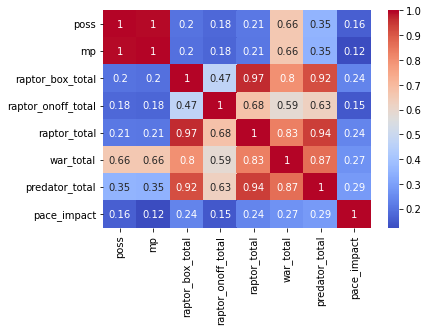

In [14]:
corr = df.corr()
sns.heatmap(corr, cmap = 'coolwarm', annot = True)

## we can see total WAR and total RAPTOR have a fairly close correlation

Text(0, 0.5, 'How many players?')

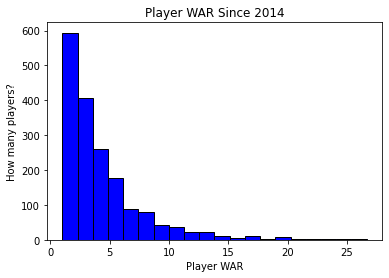

In [15]:
plt.hist(df['war_total'], color='blue', edgecolor = 'black',
         bins = int(180/9))

plt.title('Player WAR Since 2014')
plt.xlabel('Player WAR')
plt.ylabel('How many players?')

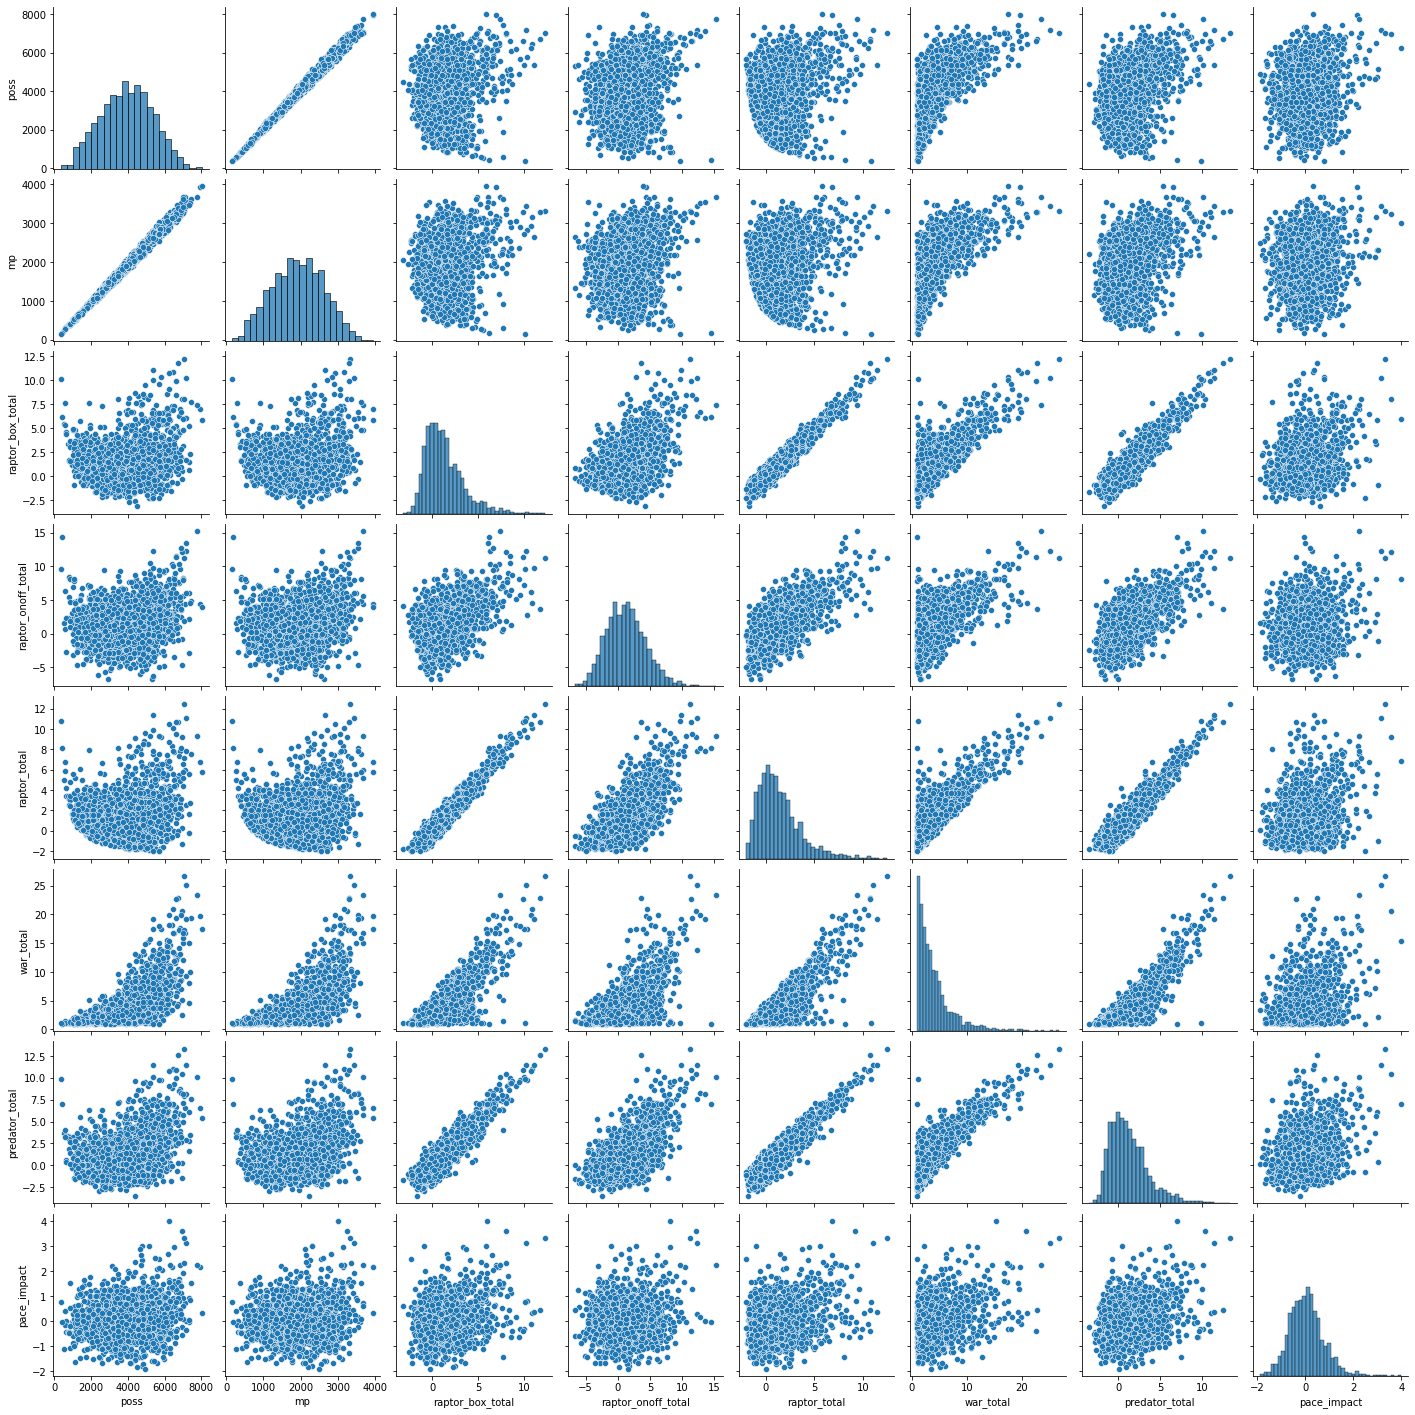

In [16]:
sns.pairplot(df)

## found this cool viz thanks to https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-on-data-visualization-in-python/
## we can see from this spread of charts that WAR and RAPTOR have a very discernable, positive correlation

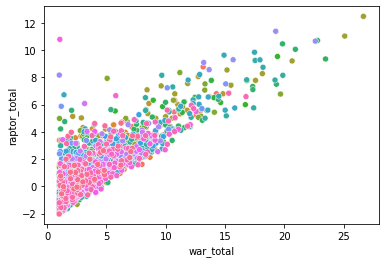

In [17]:
sns.scatterplot(data=df, x='war_total', y='raptor_total', hue='player_name', legend = False)

## there are one or two distinct outliers that give us a better picture of who could be our ideal player

In [18]:
maxWAR = df[['player_name', 'war_total', 'raptor_total']].max()
print(maxWAR) 

player_name     Zion Williamson
war_total             26.666873
raptor_total          12.487858
dtype: object


In [19]:
print('Our highest WAR candidate is ')
print(df[df.war_total == df.war_total.max()])

Our highest WAR candidate is 
       player_name  poss    mp  raptor_box_total  raptor_onoff_total  \
902  Stephen Curry  7053  3314         12.221375           11.189594   

     raptor_total  war_total  predator_total  pace_impact  
902     12.487858  26.666873       13.347925     3.306111  


In [20]:
print('Our highest RAPTOR candidate is ')
print(df[df.raptor_total == df.raptor_total.max()])

## our top choice is Steph Curry (who is shocked?)

Our highest RAPTOR candidate is 
       player_name  poss    mp  raptor_box_total  raptor_onoff_total  \
902  Stephen Curry  7053  3314         12.221375           11.189594   

     raptor_total  war_total  predator_total  pace_impact  
902     12.487858  26.666873       13.347925     3.306111  


In [23]:
x = df[['war_total', 'raptor_total']]
x

,war_total,raptor_total
0,1.249008,-0.601411
6,1.123479,-0.233607
16,2.569432,0.112691
17,10.711333,5.462939
18,3.775858,0.146187
...,...,...
4061,2.293203,1.542963
4062,2.508760,-0.051169
4076,1.217134,-0.548676
4077,6.224207,4.649308


In [24]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

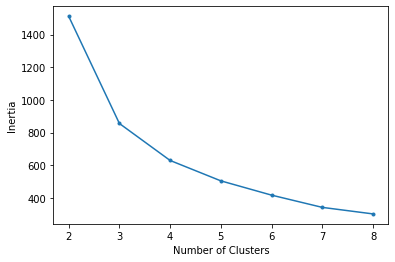

In [28]:
ks = range(2,9) 
inertias = []

for k in ks:
   kmeans = KMeans(n_clusters=k, random_state=42)
   kmeans.fit(scaled_x)
   inertias.append(kmeans.inertia_)

plt.plot(ks, inertias, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

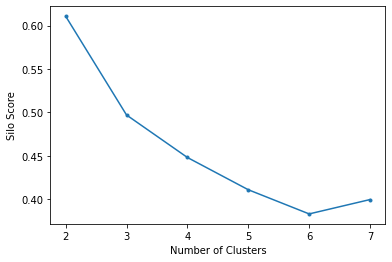

In [34]:
ks = range(2,8)
sil = []

for k in ks:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(scaled_x)
  sil.append(silhouette_score(scaled_x, kmeans.labels_))

plt.plot(ks, sil, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silo Score')
plt.show()

In [31]:
km = KMeans(n_clusters=2, random_state=42)
km.fit(scaled_x)
silhouette_score(scaled_x, kmeans.labels_)

0.38082972223731576

In [36]:
kmeans3 = KMeans(n_clusters = 3)
kmeans3.fit(scaled_x)

KMeans(n_clusters=3)

Text(0.5, 1.0, 'KMeans 3 Clusters')

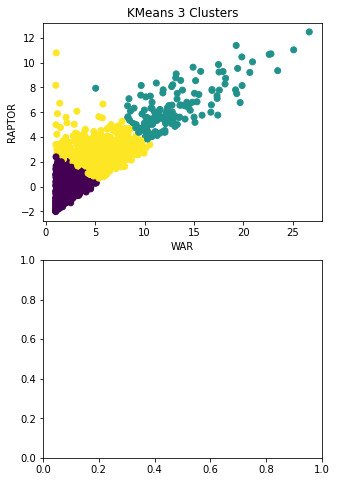

In [45]:
df['cluster3'] = kmeans3.labels_

fig, axes = plt.subplots(2, figsize=(5,8))
axes[0].scatter(df['war_total'], df['raptor_total'], c = df['cluster3'])
axes[0].set_xlabel('WAR')
axes[0].set_ylabel('RAPTOR')
axes[0].set_title('KMeans 3 Clusters')

In [46]:
y = df['war_total']
X = df.drop(columns = 'war_total')

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [53]:
pca = PCA(n_components = .98)
processor = make_pipeline(scaler, pca)

In [56]:
print('Shape before PCA:', X_train.shape)
print('Shape after PCA:', processor.fit_transform(X_train).shape)
print('Column count reduced by: ', X_train.shape[1] - processor.fit_transform(X_test).shape[1])

Shape before PCA: (444, 9)


ValueError: ignored

In [ ]:
def eval_classification(model, X_train, X_test, y_train, y_test):
  print('Train Report:', classification_report(y_train, model.predict(X_train)))
  print('Test Report:', classification_report(y_test, model.predict(X_test)))

  cm = confusion_matrix(y_test, model.predict(X_test))

  plt.figure(figsize=(15, 15))
  heatmap(cm, annot=True)
  plt.xlabel('Predicted', fontsize=40)
  plt.ylabel('True', fontsize=40)
  plt.show()

In [58]:
knn = KNeighborsClassifier()
knn_pca_pipe = make_pipeline(scaler, pca, knn)
knn_pca_pipe.fit(X_train, y_train)

ValueError: ignored

In [ ]:
eval_classification(knn_pca_pipe, X_train, X_test, y_train, y_test)